## **Voice Detection using frequency values**
-  using Random Forest

In [32]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score, precision_score, f1_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [33]:
df = pd.read_csv('../data/voice.csv')

In [34]:
df.head(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male


In [35]:
print(df.isnull().any(),'\n')

print(df.isnull().sum())

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool 

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


In [36]:
#geting names of all the attributes using this function
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [37]:
# storing the colm names into cols variable including target cloumns
cols = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx','label']
print(cols)

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


## **Convert to integer and standardization of the data**

In [38]:
# convert all the datatypes into string dtype
df[cols] = df[cols].astype(str)
# dtypes of all the elements will be converted to object/string >> 

In [39]:
# checking dtypes of the df
df.dtypes

meanfreq    object
sd          object
median      object
Q25         object
Q75         object
IQR         object
skew        object
kurt        object
sp.ent      object
sfm         object
mode        object
centroid    object
meanfun     object
minfun      object
maxfun      object
meandom     object
mindom      object
maxdom      object
dfrange     object
modindx     object
label       object
dtype: object

In [40]:
# Use LabelEncoder here
le = LabelEncoder()

In [41]:
# applying label encoding and converted all the string data into numbers
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [42]:
#using labelencoder changed dtype to integer
df.dtypes

meanfreq    int32
sd          int32
median      int32
Q25         int32
Q75         int32
IQR         int32
skew        int32
kurt        int32
sp.ent      int32
sfm         int32
mode        int32
centroid    int32
meanfun     int32
minfun      int32
maxfun      int32
meandom     int32
mindom      int32
maxdom      int32
dfrange     int32
modindx     int32
label       int32
dtype: object

In [43]:
df.head(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,3,2243,6,35,3,1305,1315,1039,1379,2151,...,3,66,44,117,0,1,0,0,0,1
1,5,2392,9,45,4,1292,2458,2402,1347,2272,...,5,485,52,95,5,1,3,7,63,1
2,8,2964,8,24,11,2616,2976,149,516,2072,...,8,267,41,113,2,1,1,1,36,1


In [44]:
#dividing into input data and target class 
X = df.drop('label',axis =1)
y  = df['label']

In [45]:
# checking the shapes of both data and target variable
X.shape,y.shape


((3168, 20), (3168,))


## **normalize the data**

In [46]:
# create new cols variable for X splitted dataframe
# beause we do not want to scale the output/ target class 
Xcols = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
print(Xcols)

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaler = sc.fit_transform(X[Xcols].iloc[:,range(0,10)].values)
X.head(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,3,2243,6,35,3,1305,1315,1039,1379,2151,0,3,66,44,117,0,1,0,0,0
1,5,2392,9,45,4,1292,2458,2402,1347,2272,0,5,485,52,95,5,1,3,7,63
2,8,2964,8,24,11,2616,2976,149,516,2072,0,8,267,41,113,2,1,1,1,36


In [48]:
X.head(), X.dtypes

(   meanfreq    sd  median  Q25  Q75   IQR  skew  kurt  sp.ent   sfm  mode  \
 0         3  2243       6   35    3  1305  1315  1039    1379  2151     0   
 1         5  2392       9   45    4  1292  2458  2402    1347  2272     0   
 2         8  2964       8   24   11  2616  2976   149     516  2072     0   
 3       464  2580     562  485  736  2165   258  1375    3018  2990   196   
 4       248  2826     214  329  647  2714   139  1414    3136  3135   372   
 
    centroid  meanfun  minfun  maxfun  meandom  mindom  maxdom  dfrange  \
 0         3       66      44     117        0       1       0        0   
 1         5      485      52      95        5       1       3        7   
 2         8      267      41     113        2       1       1        1   
 3       464       95     166      95      281       1      67       79   
 4       248      447     119     109     1369       1     743      787   
 
    modindx  
 0        0  
 1       63  
 2       36  
 3     2481  
 4     2

In [49]:
y.shape, X.shape


((3168,), (3168, 20))

# this is an important step to reshape

In [50]:
#y = pd.factorize(df['label'])[0].reshape(-1, 1) 


In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 150)

In [52]:
print(xtest.shape)
print(ytest.shape)
ytest.dtype

(951, 20)
(951,)


dtype('int32')

In [53]:
rf = RandomForestClassifier(criterion = 'entropy',
                            max_depth = 10,
                            n_estimators = 50)

In [54]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50)

In [55]:
rf.predict(xtrain)

array([0, 1, 0, ..., 1, 0, 1])

In [56]:
xtrain

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
3167,848,3132,1268,291,2613,3036,881,1960,2621,2639,2731,848,2864,817,113,339,1,66,77,2828
482,2299,2123,2534,1482,2704,2321,1572,2625,1658,1532,2548,2299,1008,73,109,1620,37,756,788,1066
2282,2920,858,2775,2727,2770,1112,166,1060,1105,837,2788,2920,2215,675,121,2852,21,1014,1049,1903
2135,1383,201,1256,2149,250,141,2692,635,232,532,1394,1383,2637,171,95,623,1,865,908,114
256,2948,1004,3000,2999,2799,520,2602,631,733,61,2299,2948,1531,506,117,1735,1,768,811,2030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,3050,283,2948,3024,2446,98,2371,320,183,257,2342,3050,2788,670,121,2342,6,241,262,540
496,2401,835,2011,2065,1664,1198,643,2117,1805,330,1693,2401,1501,399,117,2127,47,799,825,1349
25,818,2699,452,923,2145,2582,3014,1654,2664,2644,169,818,60,40,98,136,1,170,192,1264
2490,2597,207,2181,2695,1171,88,2301,98,139,335,1773,2597,2781,653,121,1912,6,819,860,1198


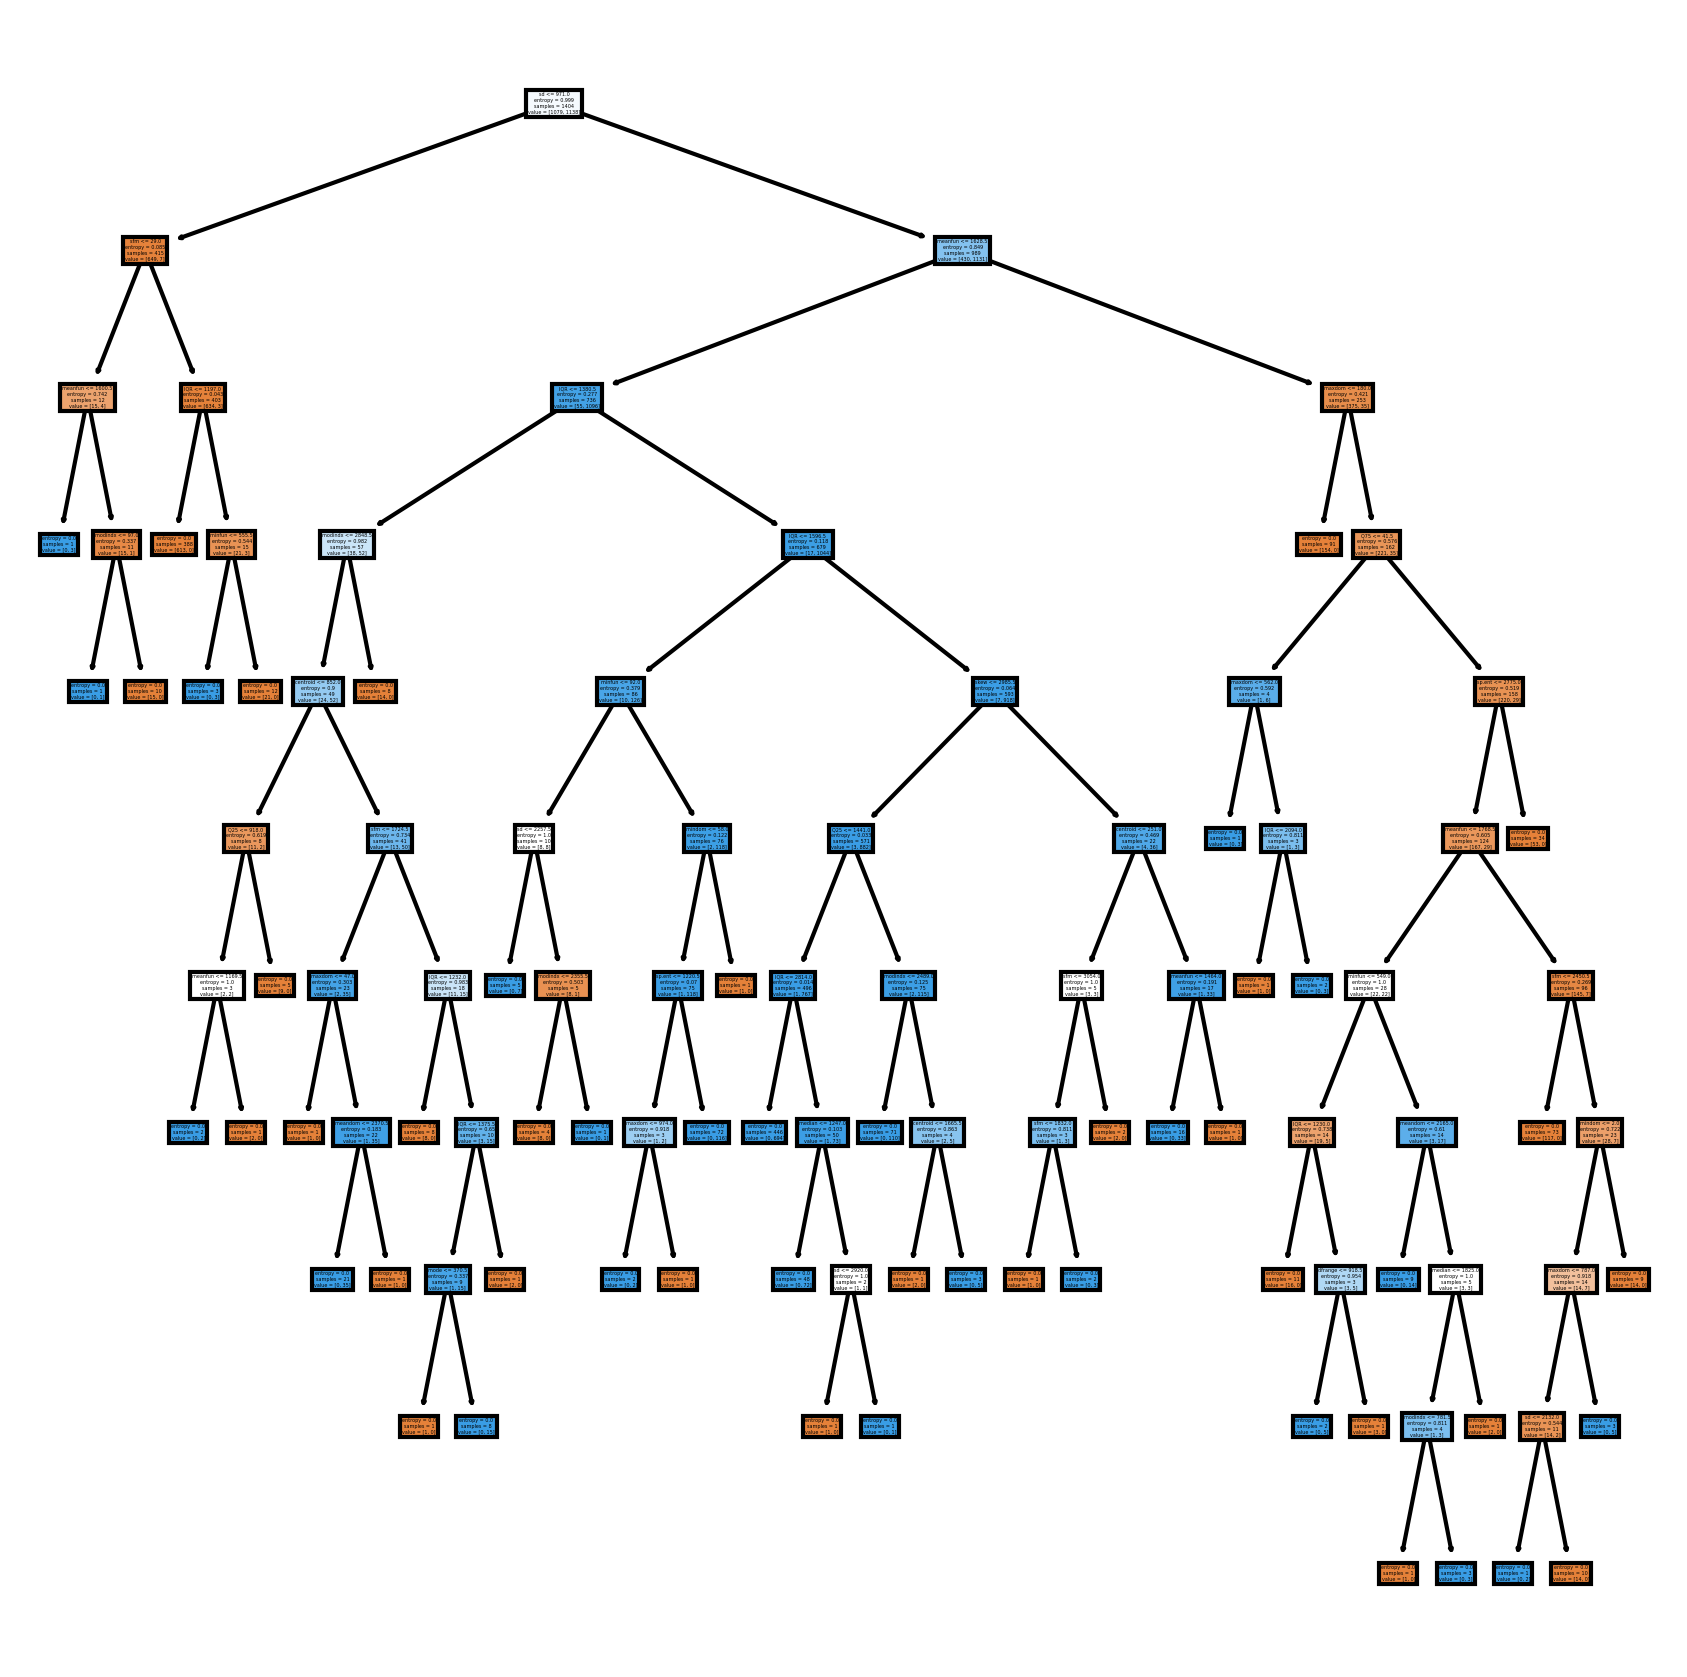

In [57]:
from sklearn import tree
fig = plt.subplots(figsize =(7,7),dpi=300)
tree.plot_tree(rf.estimators_[10],
               feature_names =xtrain.columns,
               filled = True);

In [58]:
predictions = rf.predict(xtest)


In [59]:
predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [60]:
confusion_matrix(ytest,predictions)

array([[469,   8],
       [  7, 467]], dtype=int64)

## **Display confusion matrix***

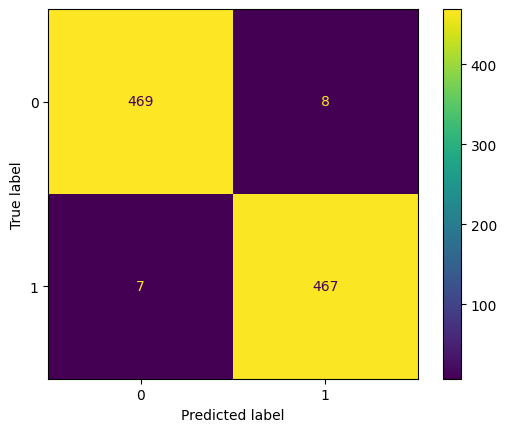

In [61]:
cm = confusion_matrix(ytest,predictions)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels = rf.classes_
)
disp.plot()

In [62]:
print(f'Accuracy score is {accuracy_score(ytest,predictions)}')
print(f'precision score is {precision_score(ytest,predictions)}')
print(f'recall score is {recall_score(ytest,predictions)}')
print(f'F1 score is {f1_score(ytest,predictions)}')

Accuracy score is 0.9842271293375394
precision score is 0.9831578947368421
recall score is 0.9852320675105485
F1 score is 0.9841938883034773
